***Name : Samiksha Padmakar Bhujbal***

***Roll No.: 2447022***

***Batch : B***

**Problem Statement ->**

Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np

In [2]:
uber = pd.read_csv("uber.csv")

In [3]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
#missing values

In [6]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
uber = uber.drop(['Unnamed: 0', 'key'], axis=1)

In [8]:
uber = uber.dropna()

In [9]:
uber = uber[(uber['fare_amount'] > 0) & (uber['passenger_count'] > 0)]

In [10]:
uber.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
#outliers

In [12]:
Q1 = uber['fare_amount'].quantile(0.25)
Q3 = uber['fare_amount'].quantile(0.75)

In [13]:
IQR = Q3 - Q1

In [14]:
uber = uber[~((uber['fare_amount'] < (Q1 - 1.5 * IQR)) | (uber['fare_amount'] > (Q3 + 1.5 * IQR)))]

In [15]:
#Extract Time and date

In [16]:
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

In [17]:
uber['hour'] = uber['pickup_datetime'].dt.hour

In [18]:
uber = uber.drop(['pickup_datetime'], axis=1)

In [19]:
uber["price"] = uber['hour']*uber['fare_amount']

In [20]:
uber.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,142.5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,154.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,270.9
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,42.4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,272.0


In [21]:
#correlation

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [24]:
corr_matrix = uber.corr()

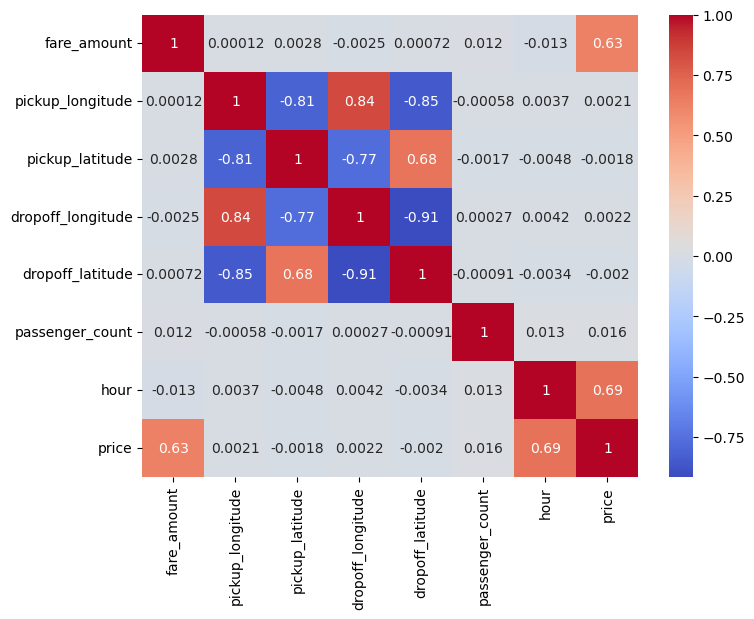

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [43]:
x = uber.drop(['fare_amount'], axis=1)
y = uber['fare_amount']

In [51]:
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
0,-73.999817,40.738354,-73.999512,40.723217,1,19,142.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,154.0
2,-74.005043,40.740770,-73.962565,40.772647,1,21,270.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,42.4
4,-73.925023,40.744085,-73.973082,40.761247,5,17,272.0
...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1,14,168.0
199995,-73.987042,40.739367,-73.986525,40.740297,1,10,30.0
199996,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
199998,-73.997124,40.725452,-73.983215,40.695415,1,14,203.0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [47]:
lr_model = LinearRegression()

In [48]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [50]:
lr_model.score(X_test,y_test)

0.7917201595662545

In [32]:
y_pred_lr = lr_model.predict(X_test)

In [33]:
ridge_model = Ridge()

In [34]:
ridge_model.fit(X_train, y_train)

Ridge()

In [35]:
y_pred_ridge = ridge_model.predict(X_test)

In [36]:
lasso_model = Lasso()

In [37]:
lasso_model.fit(X_train, y_train)

Lasso()

In [38]:
y_pred_lasso = lasso_model.predict(X_test)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - R2: {r2:.4f}, RMSE: {rmse:.2f}')

In [41]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

Linear Regression - R2: 0.7917, RMSE: 1.88
Ridge Regression - R2: 0.7917, RMSE: 1.88
Lasso Regression - R2: 0.7887, RMSE: 1.90
